In [4]:
import pandas as pd
import numpy as np

# Load full dataset
df = pd.read_csv("data/salaries.csv")

# Keep more useful features
df = df[['work_year', 'experience_level', 'employment_type', 'company_size',
         'remote_ratio', 'job_title', 'employee_residence', 'company_location',
         'salary_in_usd']]


In [5]:
# One-Hot Encode all categorical features
df = pd.get_dummies(df, 
    columns=['experience_level', 'employment_type', 'company_size', 
             'job_title', 'employee_residence', 'company_location'], 
    drop_first=True
)


In [6]:
from sklearn.model_selection import train_test_split

# Log-transform the target column
df['salary_in_usd'] = np.log1p(df['salary_in_usd'])

# Split features and target
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Initialize Random Forest with tuned (improved) parameters
rf_model = RandomForestRegressor(
    n_estimators=150,    # More trees
    max_depth=20,        # Deeper trees
    random_state=42
)

# Train on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Convert log predictions back to original salary values
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("Random Forest MAE:", round(mae, 2))
print("Random Forest R² Score:", round(r2, 4))


Random Forest MAE: 45007.92
Random Forest R² Score: 0.2656


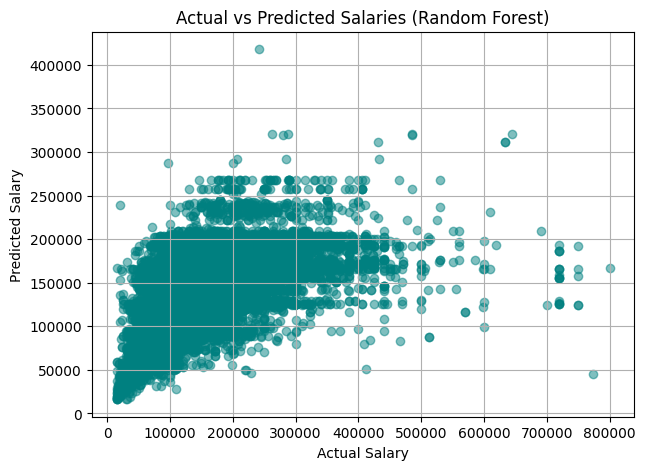

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Reverse log transform
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(y_test_real, y_pred_real, alpha=0.5, color='teal')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.grid(True)

# Save the plot
plt.savefig("output_salary_prediction.png")
plt.show()
